# Convolution Neural Network

### 참고자료 :
- https://tykimos.github.io/2017/03/08/CNN_Getting_Started/

### 데이터 출처
- http://tykimos.github.io/warehouse/2017-3-8_CNN_Getting_Started_handwriting_shape.zip

### 데이터 정보
- train
- circle
- rectangle
- triangle
- test
- circle
- rectangle
- triangle

### 데이터 부풀리기
- https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/
- rotation_range = 90 : 지정된 각도 범위내에서 임의로 원본이미지를 회전, 단위는 도이며 정수형,예를 들어 90이라면 0도에서 90도 사이에 임의의 각도로 회전 
- width_shift_range = 0.1 : 지정된 수평방향 이동 범위내에서 임의로 원본이미지를 이동시킴, 수치는 전체 넓이의 비율(실수)로 나타냄, 예를 들어 0.1이고 전체 넓이가 100이면, 10픽셀 내외로 좌우 이동
- height_shift_range = 0.1 :지정된 수직방향 이동 범위내에서 임의로 원본이미지를 이동시킴, 수치는 전체 높이의 비율(실수)로 나타냄, 예를 들어 0.1이고 전체 높이가 100이면, 10픽셀 내외로 상하 이동
- shear_range = 0.5 : 밀림 강도 범위내에서 임의로 원본이미지를 변형시킵니다. 수치는 시계반대방향으로 밀림, 강도를 라디안으로 나타냄, 예를 들어 0.5이라면, 0.5 라이안내외로 시계반대방향으로 변형
- zoom_range = 0.3 :지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소, “1-수치”부터 “1+수치”사이 범위로 확대/축소, 예를 들어 0.3이라면, 0.7배에서 1.3배 크기 변화
- horizontal_flip = True : 수평방향으로 뒤집기
- vertical_flip = True : 수직방향으로 뒤집기



### 모델 구성

- 컨볼루션 레이어 : 입력 이미지 크기 24 x 24, 입력 이미지 채널 3개, 필터 크기 3 x 3, - 필터 수 32개, 활성화 함수 ‘relu’
- 컨볼루션 레이어 : 필터 크기 3 x 3, 필터 수 64개, 활성화 함수 ‘relu’
- 맥스풀링 레이어 : 풀 크기 2 x 2
- 플래튼 레이어
- 댄스 레이어 : 출력 뉴런 수 128개, 활성화 함수 ‘relu’
- 댄스 레이어 : 출력 뉴런 수 3개, 활성화 함수 ‘softmax’

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

In [10]:
# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './data/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        './data/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [15]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=3,
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/3
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0131 - acc: 0.9951 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 2/3
1500/1500 [==============================] - 28s 19ms/step - loss: 2.1210e-07 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 3/3
1500/1500 [==============================] - 29s 19ms/step - loss: 1.2377e-07 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000


In [16]:
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

-- Evaluate --
acc: 100.00%
-- Predict --
[[0.000 1.000 0.000]
 [0.008 0.985 0.007]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [0.000 0.006 0.994]
 [0.000 0.000 1.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]


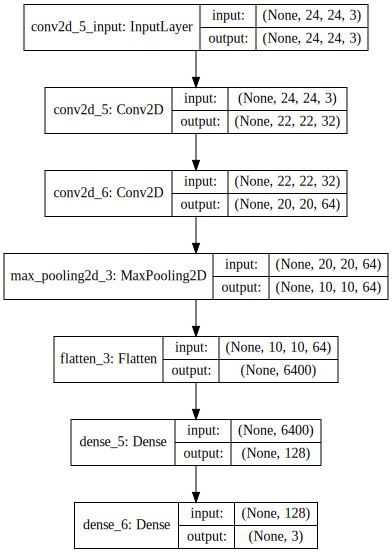

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))